<a href="https://colab.research.google.com/github/LucianPopaLVP/Deep-Learning-Project--Dog-Vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multi-class Dog Breed Classification

This notebook buils an end-to-end multi-class image classifier using Tensorflow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data used is from Kaggle's dog bread identification competition: https://www.kaggle.com/c/dog-breed-identification/overview

## 3. Evaluation

Multi-Class Log Loss: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

## 4. Features

Info about data:
* Dealing with images (unstructured data) so is probably best to use deep learning/transfer learning;
* There are 120 breeds of dogs (this means there are 120 different classes);
* There are ~ 10,000 + images in the training set(these images have labels) and ~ 10,000 images in the test set(no labels);

## Get my space ready

* Import TF 2.X ✅
* Import TF Hub ✅
* Make sure I am using a GPU ✅

In [53]:
# Import necessary tools
# Import TensorFlow and TensorFlow Hub into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSS!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available!")

TF version: 2.7.0
TF Hub version: 0.12.0
GPU available (YESSS!!!!!!!)


## Acces the data and getting it ready ( turning into tensors)

* With all ML lerning models, data has to be in numerical format. 

In [54]:
# Acces the data and checking the labels
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     dcf5b9d3ab80c6829b10d20b72b67746  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [55]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


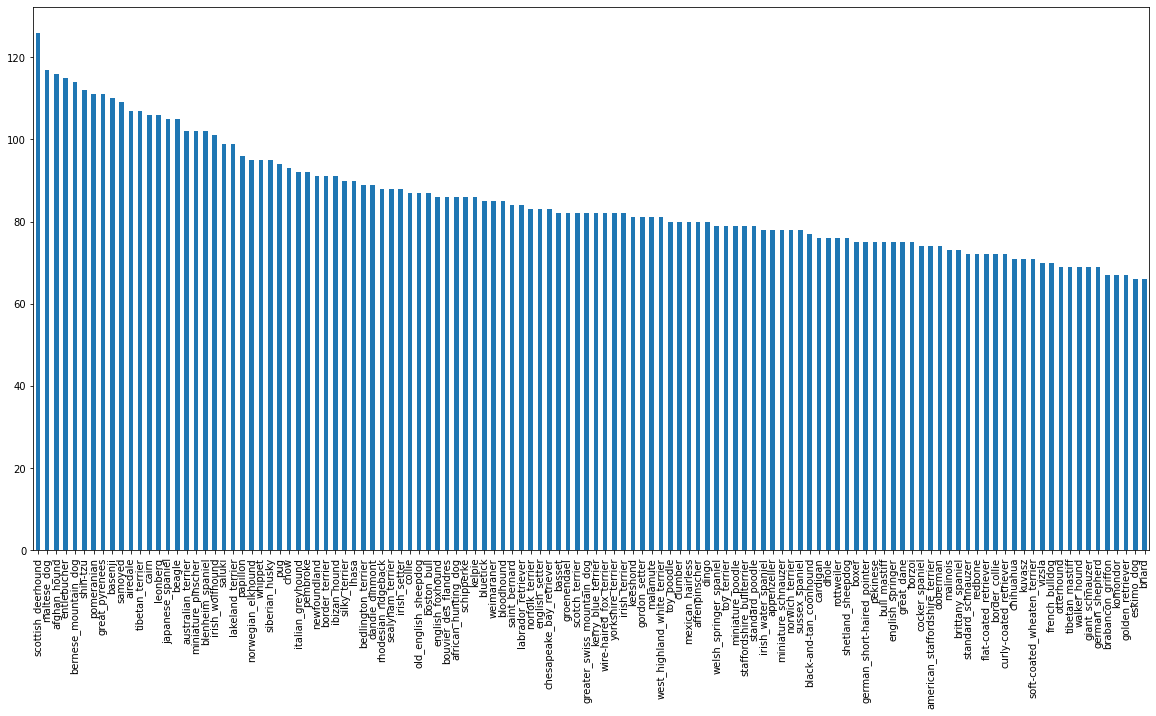

In [56]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [57]:
labels_csv["breed"].value_counts().median()

82.0

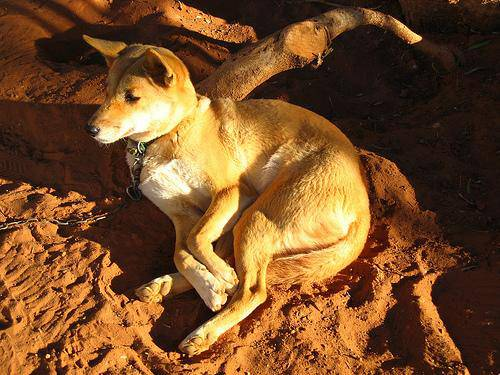

In [58]:
# View an image 
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Get a list of all of the images file pathnames.

In [59]:
# Create pathnames from image ID's
filenames = ["/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/" + fname + "jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303djpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1djpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21bjpg',
 '/content/drive/MyDrive/Colab N

In [60]:
# Check if number of filenames matches the number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train")) == len(filenames):
  print("They are matching! Proceed!")
else:
  print("They don't match! Check the target directory.")

They are matching! Proceed!


In [61]:
# Check
Image(filenames[9000])

In [62]:
labels_csv["breed"][9000]

'tibetan_mastiff'

# Prepare the labels

In [63]:
import numpy as np
labels = labels_csv["breed"] # or you can directly use `labels = labels_csv["breed"].to_numpy()`
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [64]:
len(labels)

10222

In [65]:
# Check if number of labels matches the number of filenames (to figure out if I have missing values)
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("No match! Check data directories.")

Number of labels matches number of filenames!


In [66]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [67]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [68]:
from numpy.ma.extras import unique
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [69]:
len(boolean_labels)

10222

In [70]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in bolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [71]:
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303djpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1djpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21bjpg',
 '/content/drive/MyDrive/Colab N

### Creating my own validation set

Since the dataset from Kaggle doesn't include a validation set, can create one to use.

In [72]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [73]:
len(filenames)

10222

#### Start off experimenting with ~ 1000 images and increase it as need it

In [74]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max: 10000, step:1000}

In [75]:
# Split the data into train and validation sets
from sklearn.model_selection import train_test_split

# Split into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [76]:
# Quick look at the training data
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3dejpg',
  '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False

## Preprocessing Images ( turning images into Tensors)

To preprocess the images into Tensors gonna write a function which does a few things:
1. Take an image filepath as input;
2. Use TensorFlow to read the file and save it to a variable `image`;
3. Turn the `image` (jpg) into Tensors;
4. Resize the `image` to be a shape of (224, 224);
5. Return the modified `image`.




In [77]:
# Importing example
# Convert image to a NumPy
from matplotlib.pyplot import imread
image = imread(filenames[9000])
image.shape
tf.constant(image) # turn image into tensor

# Make a function to preprocess images

In [78]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns it into a tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor  with 3 colour channels (Red, Green, Blue)
  

In [80]:
tensor = tf.io.read_file(filenames[26])